Файл Bank_Personal_Loan_Modelling.csv содержит данные о 5000 клиентов. Данные включают демографическую информацию о клиенте (возраст, доход и т. д.), отношения клиента с банком (ипотека, счет ценных бумаг и т. д.) и реакцию клиента на последнюю кампанию по предоставлению личных кредитов (персональный кредит). Среди этих 5000 клиентов только 480 (= 9,6%) приняли личный кредит, который был предложен им в предыдущей кампании.
Цель: цель классификации состоит в том, чтобы предсказать вероятность того, что клиент купит персональные кредиты.
Признаки (столбцы):
ID - уникальный идентификатор клиента
Age - возраст
Experience - количество лет профессионального опыта
Income - годовой доход клиента
ZIP Code - почтовый индекс
Family - количество людей в семье
CCAvg - средние расходы по кредитным картам в месяц (тыс. долл. США)
Education - уровень образования (1) бакалавриат, (2) выпускник, (3) продвинутый/профессиональный
Mortgage - cтоимость ипотечного кредита
Securities Account - есть ли у клиента счет ценных бумаг в банке (1=Да, 0=Нет)
CD Account - есть ли у клиента депозитный сертификат в банке (1=Да, 0=Нет)
Online - использует ли клиент услуги интернет-банкинга (1=Да, 0=Нет)
CreditCard - использует ли клиент кредитную карту, выпущенную Universal Bank (1=Да, 0=Нет)


In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных

In [2]:
data_raw = pd.read_csv("Bank_Personal_Loan_Modelling.csv") # https://www.kaggle.com/datasets/teertha/personal-loan-modeling
data_raw.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [55]:
data_raw.shape # 5000 rows and 14 columns

(5000, 12)

Удаление столбцов, не влияющих на Personal Loan.

In [4]:
data_raw.drop(['ID', 'ZIP Code'], axis=1, inplace=True)  # delete column 'ID' and 'ZIP Code'
data_raw.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [57]:
data_raw.shape # 5000 rows and 12 columns

(5000, 12)

In [5]:
data_raw.isnull().sum() # nothing is null

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [58]:
data_raw['Personal Loan'].value_counts() # 480 of 5000 people took a Personal Loan

0    4520
1     480
Name: Personal Loan, dtype: int64

In [7]:
data_raw.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


we can see that at least one 'Experience' column is negative (equals to -3), so it must be fixed

In [59]:
data_raw['Experience'] = data_raw['Experience'].apply(lambda x: abs(x) if(x < 0) else x) # заменяем отрицательные значения на их модули
data_raw.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


now min of 'Experience' columns is 0

<AxesSubplot: xlabel='Income', ylabel='Personal Loan'>

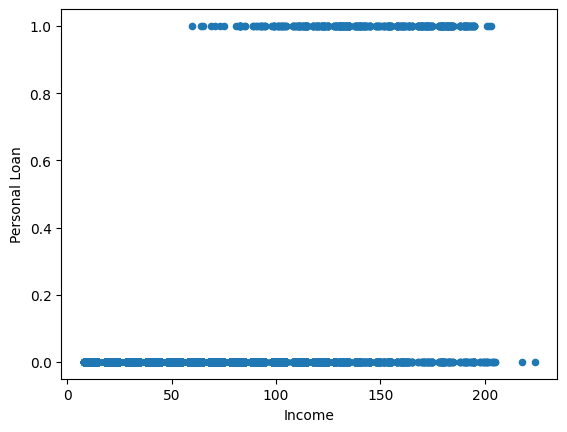

In [9]:
data_raw.plot(kind='scatter', x='Income', y='Personal Loan')

array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Experience', ylabel='Age'>,
        <AxesSubplot: xlabel='Income', ylabel='Age'>,
        <AxesSubplot: xlabel='Family', ylabel='Age'>,
        <AxesSubplot: xlabel='CCAvg', ylabel='Age'>,
        <AxesSubplot: xlabel='Education', ylabel='Age'>,
        <AxesSubplot: xlabel='Mortgage', ylabel='Age'>,
        <AxesSubplot: xlabel='Personal Loan', ylabel='Age'>,
        <AxesSubplot: xlabel='Securities Account', ylabel='Age'>,
        <AxesSubplot: xlabel='CD Account', ylabel='Age'>,
        <AxesSubplot: xlabel='Online', ylabel='Age'>,
        <AxesSubplot: xlabel='CreditCard', ylabel='Age'>],
       [<AxesSubplot: xlabel='Age', ylabel='Experience'>,
        <AxesSubplot: xlabel='Experience', ylabel='Experience'>,
        <AxesSubplot: xlabel='Income', ylabel='Experience'>,
        <AxesSubplot: xlabel='Family', ylabel='Experience'>,
        <AxesSubplot: xlabel='CCAvg', ylabel='Experience'>,
        <AxesS

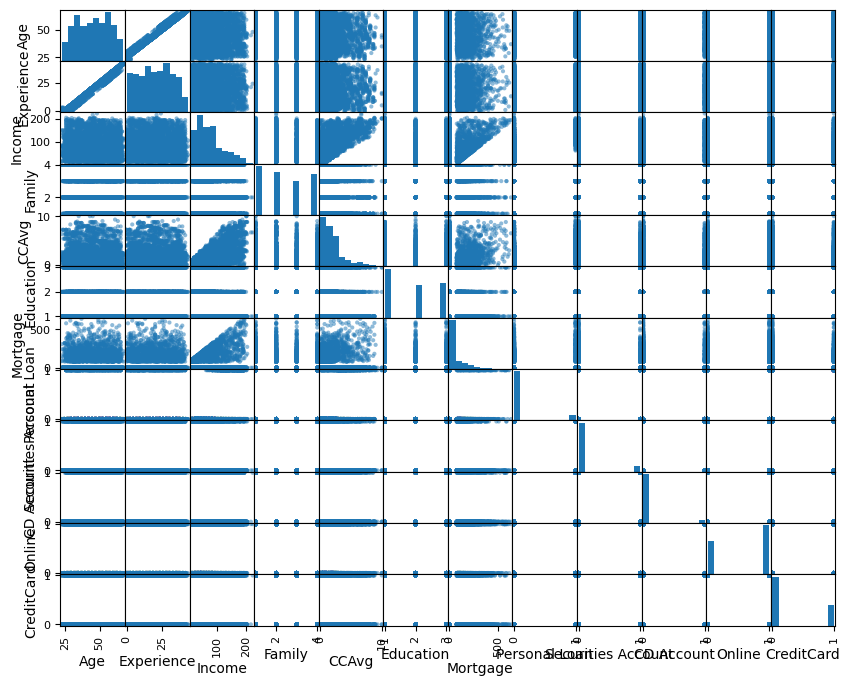

In [10]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))

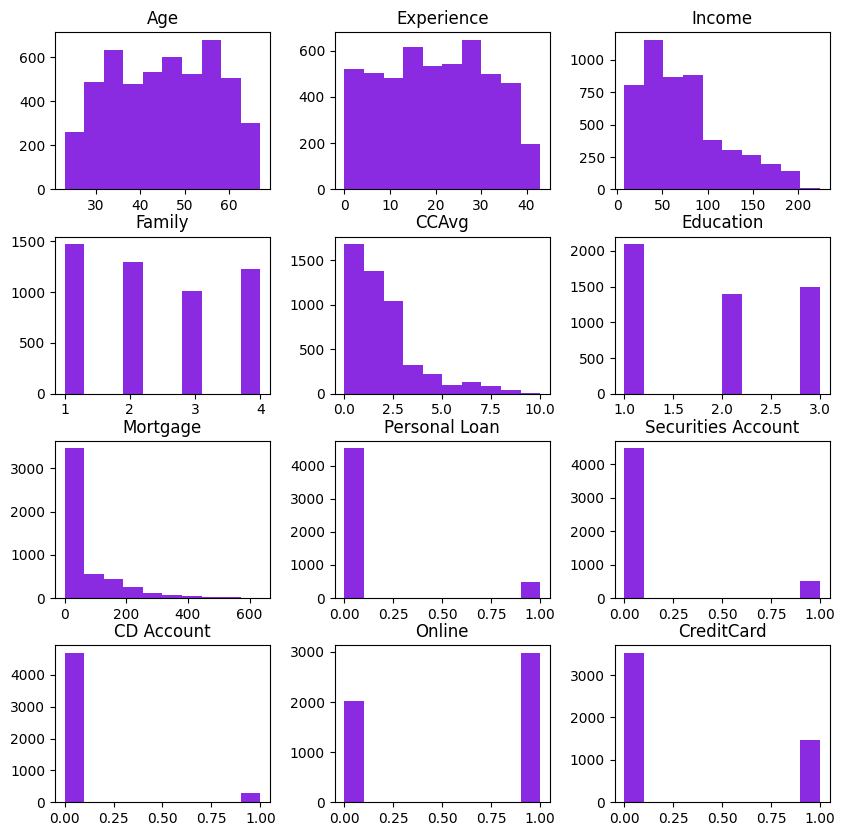

In [11]:
data_raw.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

Text(0.5, 1.0, 'Distribution of Education by Age and Experience')

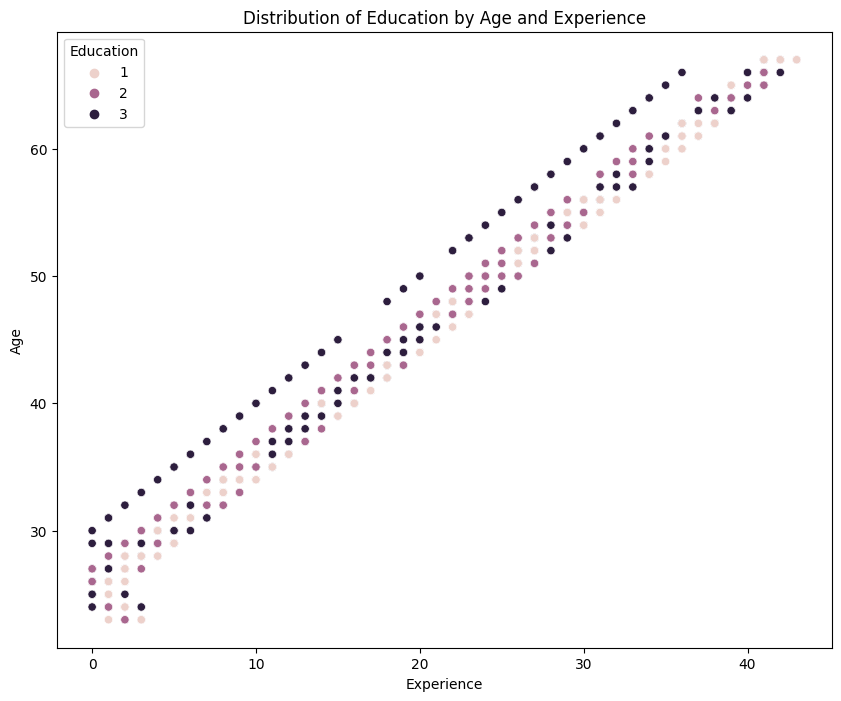

In [12]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data = data_raw, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribution of Education by Age and Experience")

Опыт и возраст дают положительную корреляцию, так как опыт увеличивается, возраст также увеличивается.

<AxesSubplot: xlabel='Online', ylabel='count'>

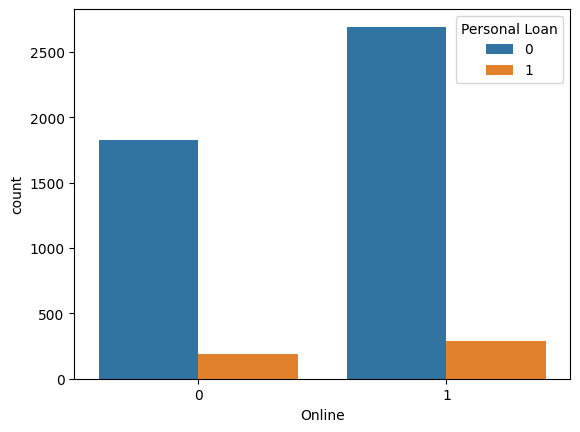

In [15]:
sns.countplot(x='Online', data=data_raw, hue='Personal Loan')

Клиенты с персональным кредитом имеют меньший счет в обоих условиях.

<AxesSubplot: xlabel='CreditCard', ylabel='count'>

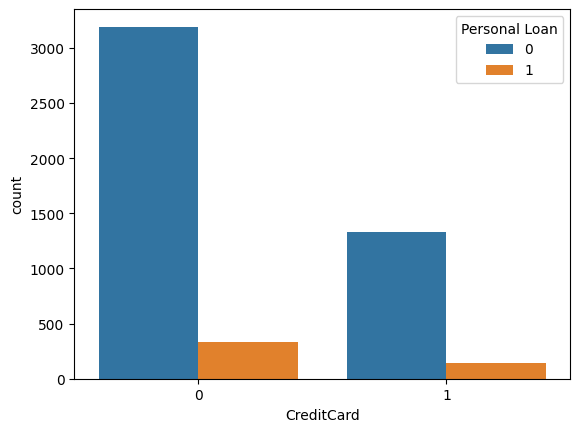

In [16]:
sns.countplot(x='CreditCard', data=data_raw, hue='Personal Loan')

Клиенты с персональным кредитом имеют меньший счет в обоих условиях.

C:\Users\kvas_\AppData\Local\Temp\ipykernel_10844\1853305080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data_raw[data_raw['Personal Loan'] == 0]['CCAvg'])


<AxesSubplot: xlabel='CCAvg', ylabel='Density'>

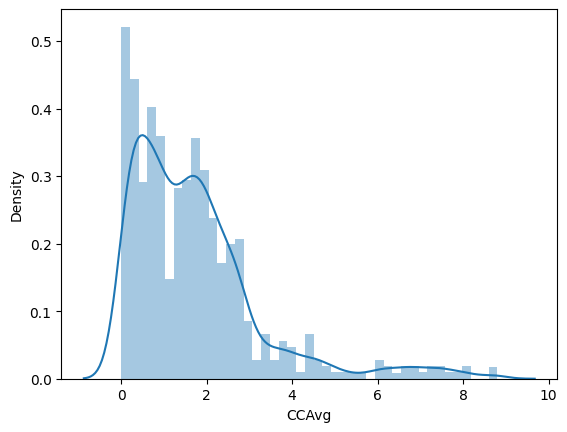

In [21]:
sns.distplot( data_raw[data_raw['Personal Loan'] == 0]['CCAvg'])

C:\Users\kvas_\AppData\Local\Temp\ipykernel_10844\661354173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data_raw[data_raw['Personal Loan'] == 1]['CCAvg'])


<AxesSubplot: xlabel='CCAvg', ylabel='Density'>

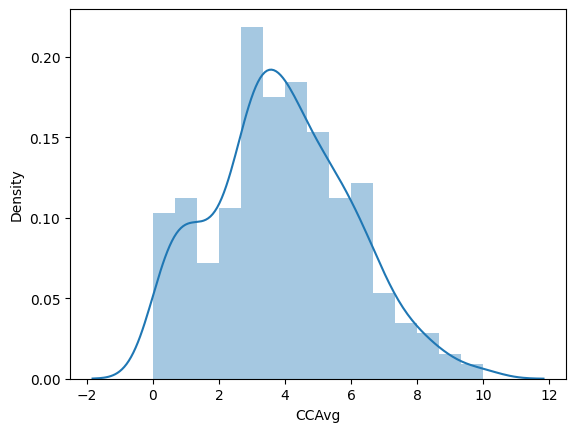

In [22]:
sns.distplot( data_raw[data_raw['Personal Loan'] == 1]['CCAvg'])

Здесь мы видим, что у клиентов с более высоким CCAvg есть Personal Loan.

In [24]:
data_raw[data_raw['Personal Loan'] == 0]['CCAvg'].median() * 1000

1400.0

In [25]:
data_raw[data_raw['Personal Loan'] == 1]['CCAvg'].median() * 1000

3800.0

Клиенты, которые тратят среднюю кредитную карту со средним значением 3800 долларов, дают более высокую вероятность личного кредита, тогда как клиенты, которые тратят более низкую кредитную карту со средним значением 1400 долларов, с меньшей вероятностью возьмут кредит.

In [27]:
cor=data_raw.corr()
cor

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


correlation matrix

<AxesSubplot: >

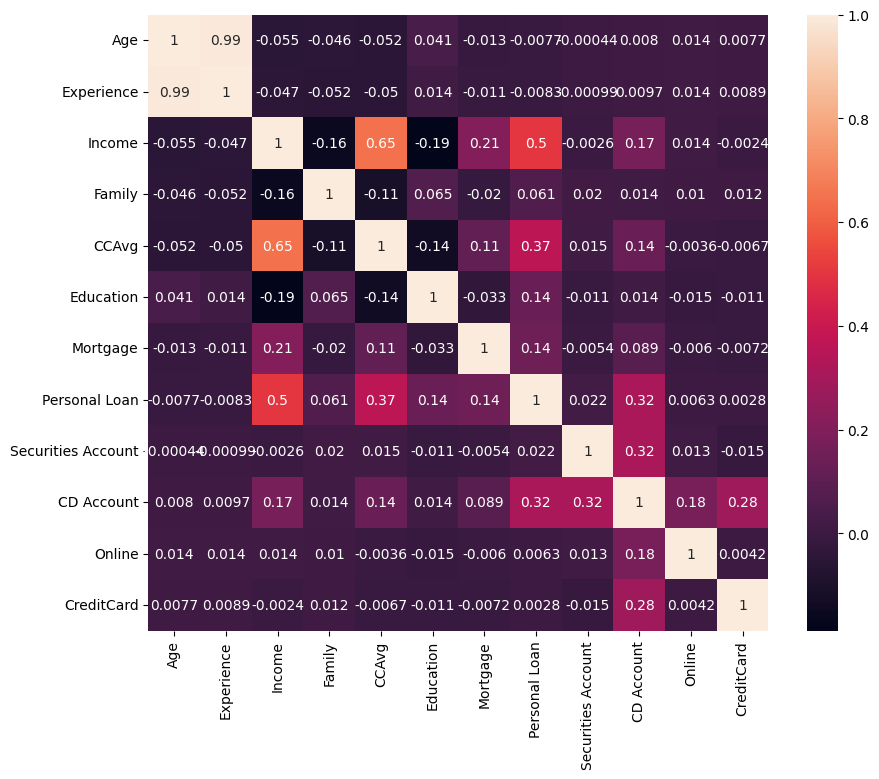

In [28]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

Heatmap

In [30]:
x = data_raw.drop(['Personal Loan'], axis=1)
y = data_raw['Personal Loan']
# 'x' for training, 'y' for predicting

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
# 30% for testing, 70% for training

1. Logistic Regression (Логистическая регрессия)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix 

In [37]:
bank_lr = LogisticRegression(solver='liblinear') # создание объекта LogisticRegression
bank_lr.fit(x_train,y_train) # вызвать подходящий метод логистической регрессии для обучения модели или для изучения параметров модели
y_predict_lr = bank_lr.predict(x_test)  # прогнозирование результата тестового набора данных и сохранение в переменной

print(f'Accuracy Score is : {accuracy_score(y_test,y_predict_lr)*100}')
print("Confusion matrix")
cm = confusion_matrix(y_test,y_predict_lr) # создание confusion matrix
print(cm)

Accuracy Score is : 94.13333333333334
Confusion matrix
[[1312   25]
 [  63  100]]


<AxesSubplot: >

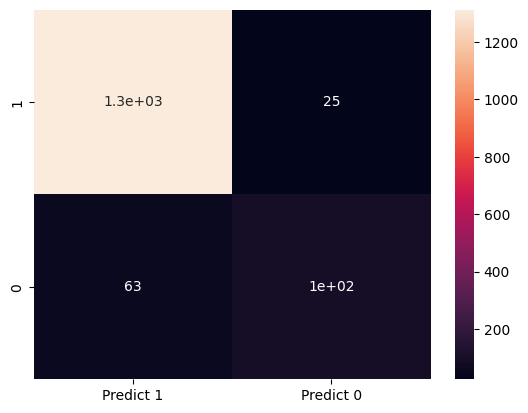

In [36]:
df_cm = pd.DataFrame(cm, index=[i for i in ["1", "0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
# Heat map for confusion matrix
sns.heatmap(df_cm, annot=True)

2. KNN (Метод k-ближайших соседей)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
bank_knn = KNeighborsClassifier(n_neighbors=5) # Создать объект класса KNeighborsClassifier
bank_knn.fit(x_train, y_train) # вызвать подходящий метод логистической регрессии для обучения модели или для изучения параметров модели
y_predict_knn = bank_knn.predict(x_test) # прогнозирование результата тестового набора данных и сохранение в переменной

print(f'Accuracy Score is : {accuracy_score(y_test, y_predict_knn)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_predict_knn) # создание confusion matrix
print(cm_knn)

Accuracy Score is : 89.26666666666667
Confusion matrix
[[1293   44]
 [ 117   46]]


In [43]:
df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])

<AxesSubplot: >

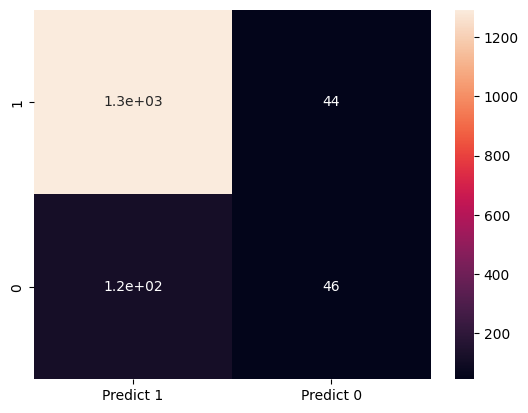

In [44]:
# Heat map for confusion matrix
sns.heatmap(df_cm_knn,annot=True)

3. Naive Bayes classifier (Наивный байесовский классификатор)

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
bank_nb = GaussianNB() # Создать объект класса GaussianNB
bank_nb.fit(x_train,y_train)  # вызвать подходящий метод логистической регрессии для обучения модели или для изучения параметров модели
y_predict_nb = bank_nb.predict(x_test) # прогнозирование результата тестового набора данных и сохранение в переменной

print(f'Accuracy Score is : {accuracy_score(y_test, y_predict_nb)*100}')  
print("Confusion matrix")
cm_nb = confusion_matrix(y_test, y_predict_nb)  # создание confusion matrix
print(cm_nb)

Accuracy Score is : 86.86666666666667
Confusion matrix
[[1207  130]
 [  67   96]]


In [47]:
df_cm_nb=pd.DataFrame(cm_nb,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])

<AxesSubplot: >

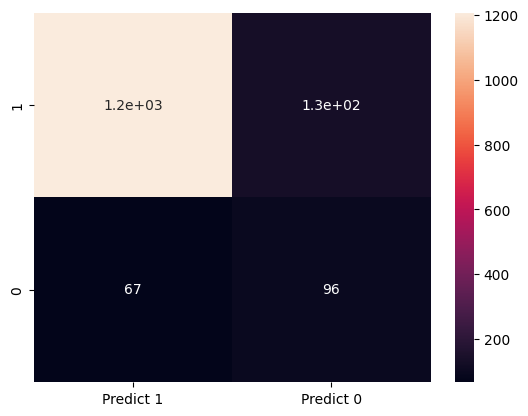

In [48]:
# Heat map for confusion matrix
sns.heatmap(df_cm_nb,annot=True)

4. DecisionTree (Дерево решений)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
bank_dt = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
bank_dt.fit(x_train,y_train)
y_predict_dt = bank_dt.predict(x_test)
y_predict_dt_train = bank_dt.predict(x_train)

print(f'Train accuracy Score is : {accuracy_score(y_train, y_predict_dt_train)*100}')  
print("Train confusion matrix")
cm_dt_train = confusion_matrix(y_train, y_predict_dt_train)  # создание confusion matrix
print(cm_dt_train)
print('-' * 50)
print(f'Test accuracy Score is : {accuracy_score(y_test, y_predict_dt)*100}')  
print("Test confusion matrix")
cm_dt = confusion_matrix(y_test, y_predict_dt)  # создание confusion matrix
print(cm_dt)



Train accuracy Score is : 100.0
Train confusion matrix
[[3183    0]
 [   0  317]]
--------------------------------------------------
Test accuracy Score is : 98.33333333333333
Test confusion matrix
[[1332    5]
 [  20  143]]


In [51]:
df_cm_dt=pd.DataFrame(cm_dt, index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1","Predict 0"]])

<AxesSubplot: >

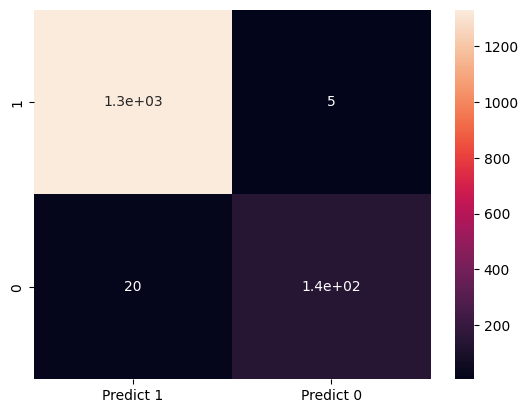

In [52]:
# Heat map for confusion matrix
sns.heatmap(df_cm_dt,annot=True)

In [54]:
bank_dt.get_depth() # глубина дерева

11

Из результатов видно, что алгоритм Дерева Решений имеет самый высокий показатель точности 98.33333333333333.

Если предсказывать Personal Loan только по годовому доходу Income?
Используем DecisionTree.

In [71]:
model_income = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model_income.fit(x_train[['Income']],y_train)

y_train_predict_income = model_income.predict(x_train[['Income']])
y_test_predict_income = model_income.predict(x_test[['Income']])

print(f'Train accuracy Score is : {accuracy_score(y_train, y_train_predict_income)*100}')  
print("Train confusion matrix")
cm_income_train = confusion_matrix(y_train, y_train_predict_income)  # создание confusion matrix
print(cm_income_train)
print('-' * 50)
print(f'Test accuracy Score is : {accuracy_score(y_test, y_test_predict_income)*100}')  
print("Test confusion matrix")
cm_income_test = confusion_matrix(y_test, y_test_predict_income)  # создание confusion matrix
print(cm_income_test)




Train accuracy Score is : 86.77142857142857
Train confusion matrix
[[2757  426]
 [  37  280]]
--------------------------------------------------
Test accuracy Score is : 84.26666666666667
Test confusion matrix
[[1136  201]
 [  35  128]]


In [75]:
print(f'Decision Tree, all features train: {accuracy_score(y_train, y_predict_dt_train)*100}   test: {accuracy_score(y_test, y_predict_dt)*100}')
print(f'Decision Tree, Income train: {accuracy_score(y_train, y_train_predict_income)*100}   test: {accuracy_score(y_test, y_test_predict_income)*100}')

Decision Tree, all features train: 100.0   test: 98.33333333333333
Decision Tree, Income train: 86.77142857142857   test: 84.26666666666667


Дерево решений со всеми параметрами было эффективнее на тренировочной и тестовой выборках.